# Student Performance Insights : From Cleaning to Clustering to Classification
## Name:Habiba abdullah said hammad

In [1]:
import warnings
warnings.filterwarnings('ignore')

### Libraries used

In [ ]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

### Data Prepration

Ok let's first start with downloading the dataset from UCI ML Repository

In [92]:
%pip install ucimlrepo -q
from ucimlrepo import fetch_ucirepo


ds = fetch_ucirepo(id=320)
X = ds.data.features
y = ds.data.targets


[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


Note that the server may be down which can cause problems of showing the dataset, however the dataset is already saved as a csv so if the server is down use that

Let's look at the meta data of the dataset 
meta data is data about data so we will have a deeper understanding of the dataset itself

In [93]:
ds.metadata

{'uci_id': 320,
 'name': 'Student Performance',
 'repository_url': 'https://archive.ics.uci.edu/dataset/320/student+performance',
 'data_url': 'https://archive.ics.uci.edu/static/public/320/data.csv',
 'abstract': 'Predict student performance in secondary education (high school). ',
 'area': 'Social Science',
 'tasks': ['Classification', 'Regression'],
 'characteristics': ['Multivariate'],
 'num_instances': 649,
 'num_features': 30,
 'feature_types': ['Integer'],
 'demographics': ['Sex', 'Age', 'Other', 'Education Level', 'Occupation'],
 'target_col': ['G1', 'G2', 'G3'],
 'index_col': None,
 'has_missing_values': 'no',
 'missing_values_symbol': None,
 'year_of_dataset_creation': 2008,
 'last_updated': 'Fri Jan 05 2024',
 'dataset_doi': '10.24432/C5TG7T',
 'creators': ['Paulo Cortez'],
 'intro_paper': {'ID': 360,
  'type': 'NATIVE',
  'title': 'Using data mining to predict secondary school student performance',
  'authors': 'P. Cortez, A. M. G. Silva',
  'venue': 'Proceedings of 5th Ann

This dataset is a *merged* view of the students math scores and porteguse scores
Ok looks like there are 649 students and 33 features. 
it also claims that there is no missing values or even symbols for missing values.
Let's take a look at the variables

In [94]:
pd.set_option("display.max_colwidth",None)
ds.variables

,name,role,type,demographic,description,units,missing_values
0,school,Feature,Categorical,None,student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira),None,no
1,sex,Feature,Binary,Sex,student's sex (binary: 'F' - female or 'M' - male),None,no
2,age,Feature,Integer,Age,student's age (numeric: from 15 to 22),None,no
3,address,Feature,Categorical,None,student's home address type (binary: 'U' - urban or 'R' - rural),None,no
4,famsize,Feature,Categorical,Other,family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3),None,no
5,Pstatus,Feature,Categorical,Other,parent's cohabitation status (binary: 'T' - living together or 'A' - apart),None,no
6,Medu,Feature,Integer,Education Level,"mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education)",None,no
7,Fedu,Feature,Integer,Education Level,"father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)",None,no
8,Mjob,Feature,Categorical,Occupation,"mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')",None,no
9,Fjob,Feature,Categorical,Occupation,"father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')",None,no


Ok so most features here are integers except for 
- school 
- sex 
- famsize
- Mjob (Mother's Job)
- Fjob (Father's Job)
- Guardian 


So these would need encoding and given that there are binary features we can one-hot encode them for consistency.
Now let's look at the dataset itself.


In [95]:
X.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,yes,no,no,4,3,4,1,1,3,4
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,yes,no,5,3,3,1,1,3,2
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,yes,no,4,3,2,2,3,3,6
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,yes,3,2,2,1,1,5,0
4,GP,F,16,U,GT3,T,3,3,other,other,...,yes,no,no,4,3,2,1,2,5,0


In [96]:
y.head()

,G1,G2,G3
0,0,11,11
1,9,11,11
2,12,13,12
3,14,14,14
4,11,13,13


Ok for reproduciatlity , I will save the dataset as csv files in the Data folder

In [97]:
X.to_csv("E:\Summer Semester 2\Training\Final Project\Data\student_features.csv",index=False)
y.to_csv("E:\Summer Semester 2\Training\Final Project\Data\student_targets.csv",index=False)

If for any reason this doens't work , the files are avalibale as csv.

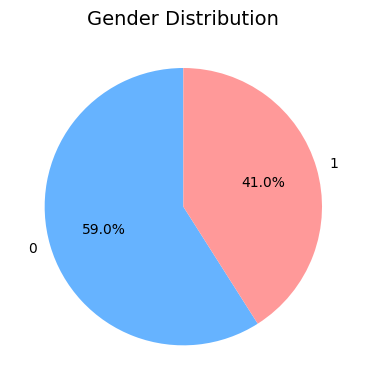

In [113]:
plt.figure(figsize=(5,4))
X['sex'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#ff9999'])
plt.title("Gender Distribution", fontsize=14)
plt.ylabel("")  # Hide y-label for pie chart
plt.tight_layout()
plt.show()

In [98]:
X=pd.read_csv("E:\Summer Semester 2\Training\Final Project\Data\student_features.csv")
y=pd.read_csv("E:\Summer Semester 2\Training\Final Project\Data\student_targets.csv")

In [4]:
X.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,yes,no,no,4,3,4,1,1,3,4
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,yes,no,5,3,3,1,1,3,2
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,yes,no,4,3,2,2,3,3,6
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,yes,3,2,2,1,1,5,0
4,GP,F,16,U,GT3,T,3,3,other,other,...,yes,no,no,4,3,2,1,2,5,0


In [5]:
y.head()

,G1,G2,G3
0,0,11,11
1,9,11,11
2,12,13,12
3,14,14,14
4,11,13,13


In [6]:
#will need this is in visulaization and EDA
import copy 
X_original=copy.deepcopy(X)
X_original

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,yes,no,no,4,3,4,1,1,3,4
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,yes,no,5,3,3,1,1,3,2
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,yes,no,4,3,2,2,3,3,6
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,yes,3,2,2,1,1,5,0
4,GP,F,16,U,GT3,T,3,3,other,other,...,yes,no,no,4,3,2,1,2,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,yes,yes,no,5,4,2,1,2,5,4
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,yes,yes,no,4,3,4,1,1,1,4
646,MS,F,18,U,GT3,T,1,1,other,other,...,yes,no,no,1,1,1,1,1,5,6
647,MS,M,17,U,LE3,T,3,1,services,services,...,yes,yes,no,2,4,5,3,4,2,6


Now that that's setteled, Let's check for duplicates and missing values

In [7]:
dup_count=X.duplicated().sum()
dup_count

0

In [8]:
missing_count=X.isnull().sum()
missing_count

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
dtype: int64

Ok so no duplicates or null values , let's now check for outliers , I will use the IQR method since it is the most simple and when plotted in a box plot it makes it easier to detect outliers while still vieweing the distribution of the features.

This function will check for outliers for all the numeric values 

In [9]:
def detect_outliers_iqr(df, threshold=1.5):
    outlier_summary = {}

    for col in df.select_dtypes(include=["int64"]).columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower = Q1 - threshold * IQR
        upper = Q3 + threshold * IQR

        outliers = df[(df[col] < lower) | (df[col] > upper)]
        outlier_summary[col] = {
            "outlier_count": outliers.shape[0],
            "lower_bound": lower,
            "upper_bound": upper,
            "min_value": df[col].min(),
            "max_value": df[col].max()
        }
    return pd.DataFrame(outlier_summary).T.sort_values("outlier_count", ascending=False)


And this function is to plot boxplots

In [10]:
def plot_outliers_boxplots(df):
    numeric_cols = df.select_dtypes(include=["int64"]).columns
    n = len(numeric_cols)

    rows = (n // 2) + (n % 2)
    plt.figure(figsize=(12, 4*rows))

    for i, col in enumerate(numeric_cols, 1):
        plt.subplot(rows, 2, i)
        sns.boxplot(x=df[col], color="skyblue")
        plt.title(f"Boxplot of {col}")
        plt.xlabel(col)

    plt.tight_layout()
    plt.show()

In [11]:
outlier_report=detect_outliers_iqr(X)
outlier_report

,outlier_count,lower_bound,upper_bound,min_value,max_value
failures,100.0,0.0,0.0,0.0,3.0
famrel,51.0,2.5,6.5,1.0,5.0
freetime,45.0,1.5,5.5,1.0,5.0
studytime,35.0,-0.5,3.5,1.0,4.0
Dalc,34.0,-0.5,3.5,1.0,5.0
absences,21.0,-9.0,15.0,0.0,32.0
traveltime,16.0,-0.5,3.5,1.0,4.0
age,1.0,13.0,21.0,15.0,22.0
Medu,0.0,-1.0,7.0,0.0,4.0
Fedu,0.0,-2.0,6.0,0.0,4.0


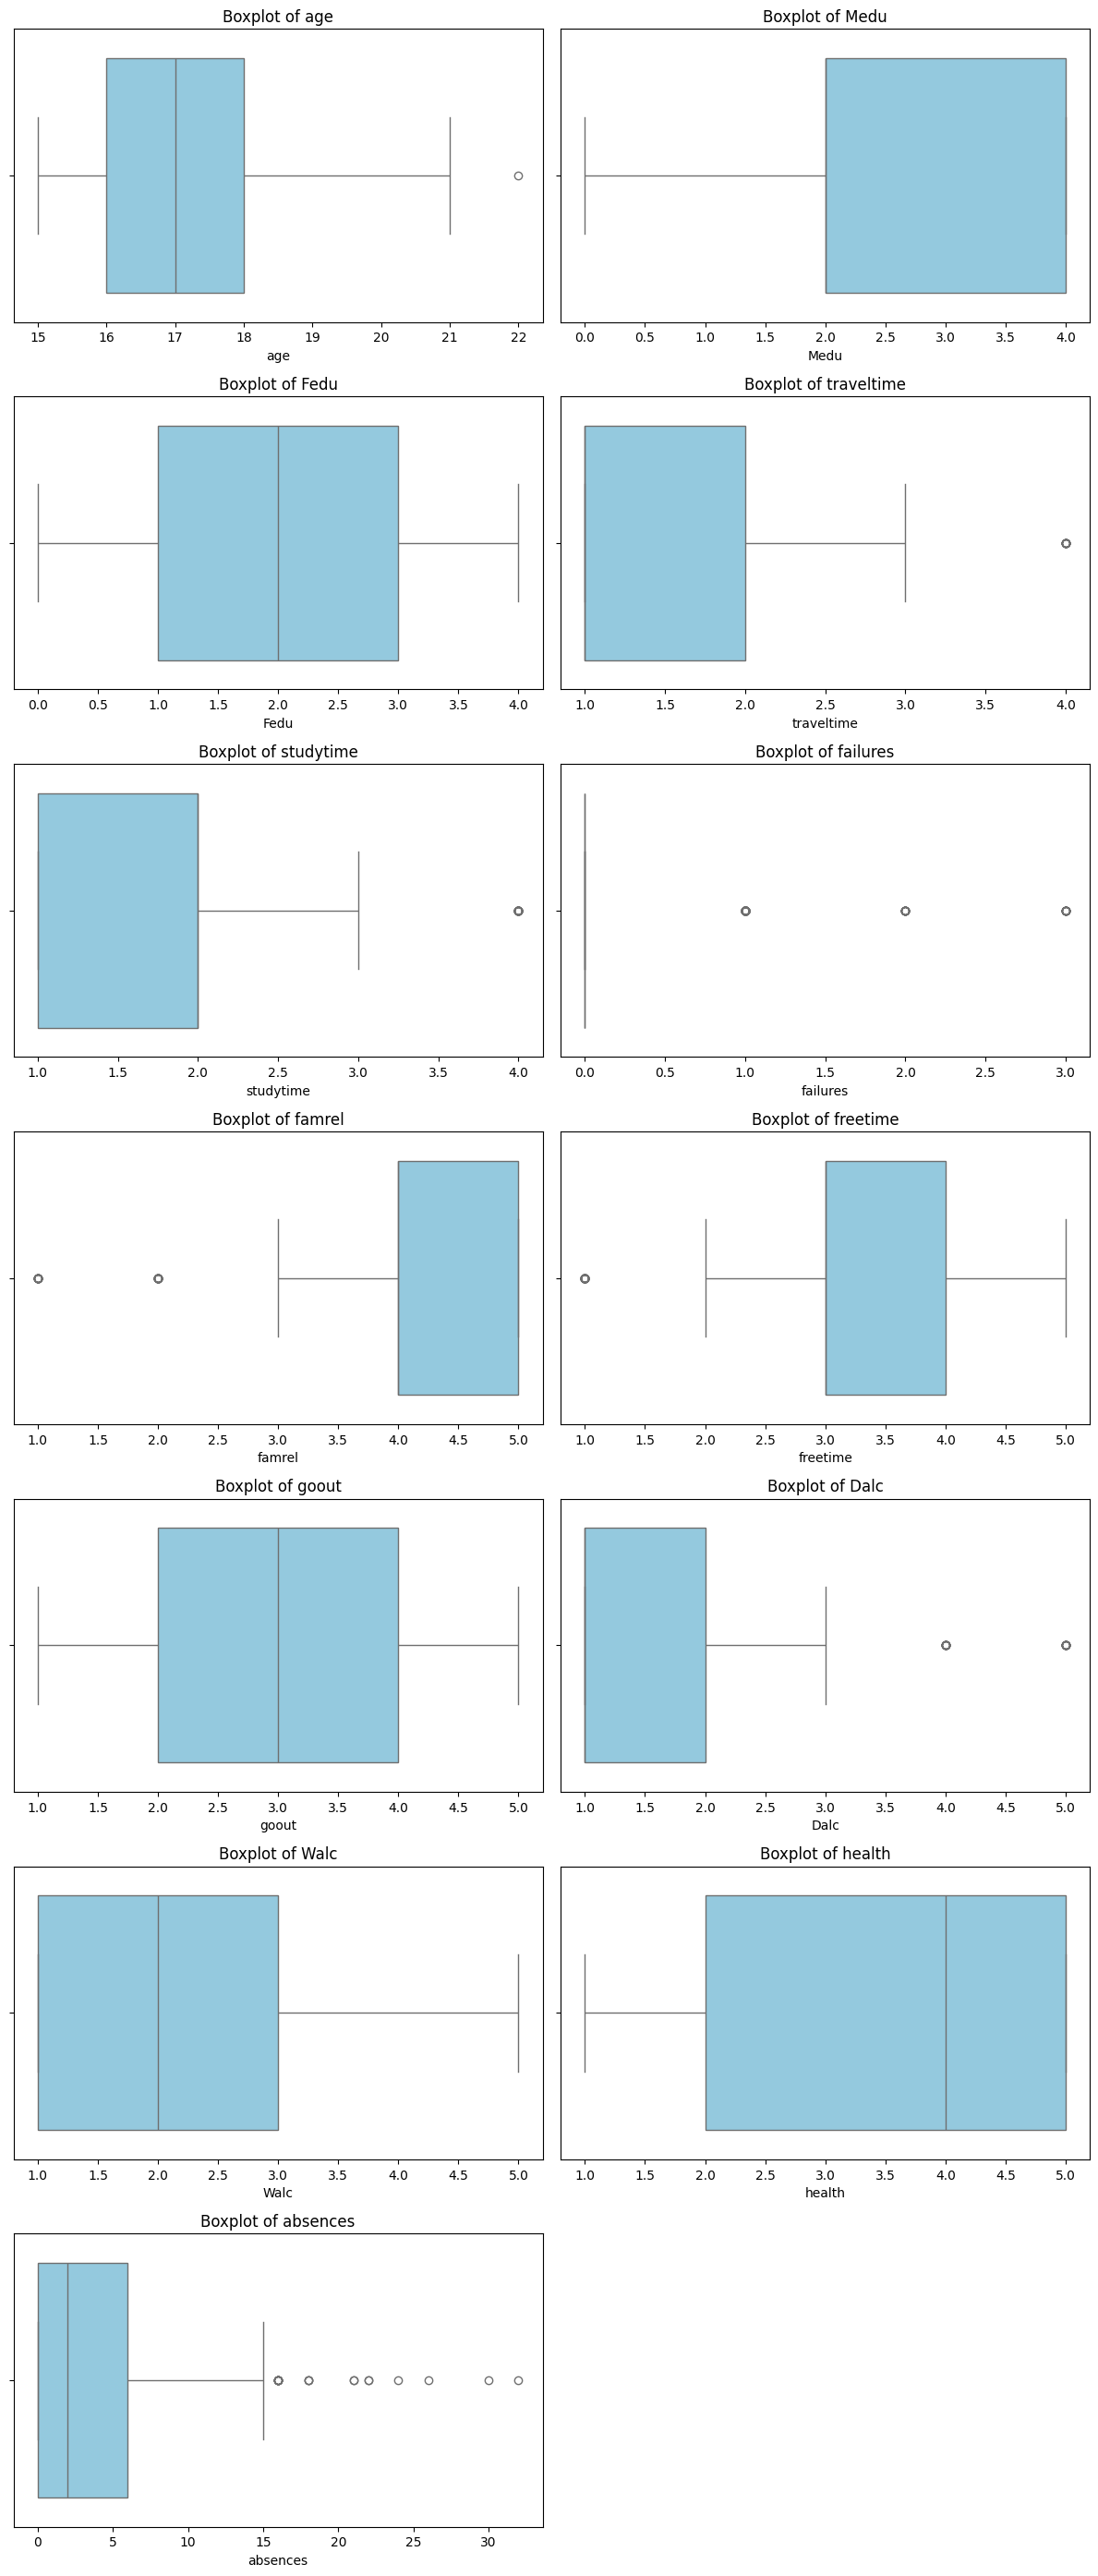

In [12]:
plot_outliers_boxplots(X)

Looking at the features , absences at first glance look a little off but after some thinking , yes some students can have be absent for most of the year (Reasons could be Travel) but to not let it affect the model , we can replace the values beyond a threshold with the nearest non-outlier value.

Now for featues like Famrel , FreeTime and Dalc (Daily alcoholic consumption) have some outliers but theya re not significant and are also logical. 

Finally , the failures feature , at first glance , looks like it needs to be dropped right away but actually it is an ordinal Categorical value with values ranging from 0 (no past failures) to 3 (3 or more past failures)

Let's cap absences at 95th percentile for top 5% of values above 30 

In [13]:
upper=X['absences'].quantile(0.95)
X['absences']=X['absences'].clip(upper=upper)

In [14]:
Q1 = X['absences'].quantile(0.25)
Q3 = X['absences'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Lower Bound for absences: {lower_bound}")
print(f"Upper Bound for absences: {upper_bound}")

Lower Bound for absences: -9.0
Upper Bound for absences: 15.0


In [15]:
outliers_lower_after = (X['absences'] < lower_bound).sum()
outliers_upper_after = (X['absences'] > upper_bound).sum()
total_outliers_after = outliers_lower_after + outliers_upper_after

print(f"Lower Outliers after capping: {outliers_lower_after}")
print(f"Upper Outliers after capping: {outliers_upper_after}")
print(f"Total Outliers after capping: {total_outliers_after}")

Lower Outliers after capping: 0
Upper Outliers after capping: 0
Total Outliers after capping: 0


Now the maximum value is 12 absences. Let's go on to the target features

In [16]:
outlier_target_report=detect_outliers_iqr(y)
outlier_target_report

,outlier_count,lower_bound,upper_bound,min_value,max_value
G2,25.0,5.5,17.5,0.0,19.0
G1,16.0,5.5,17.5,0.0,19.0
G3,16.0,4.0,20.0,0.0,19.0


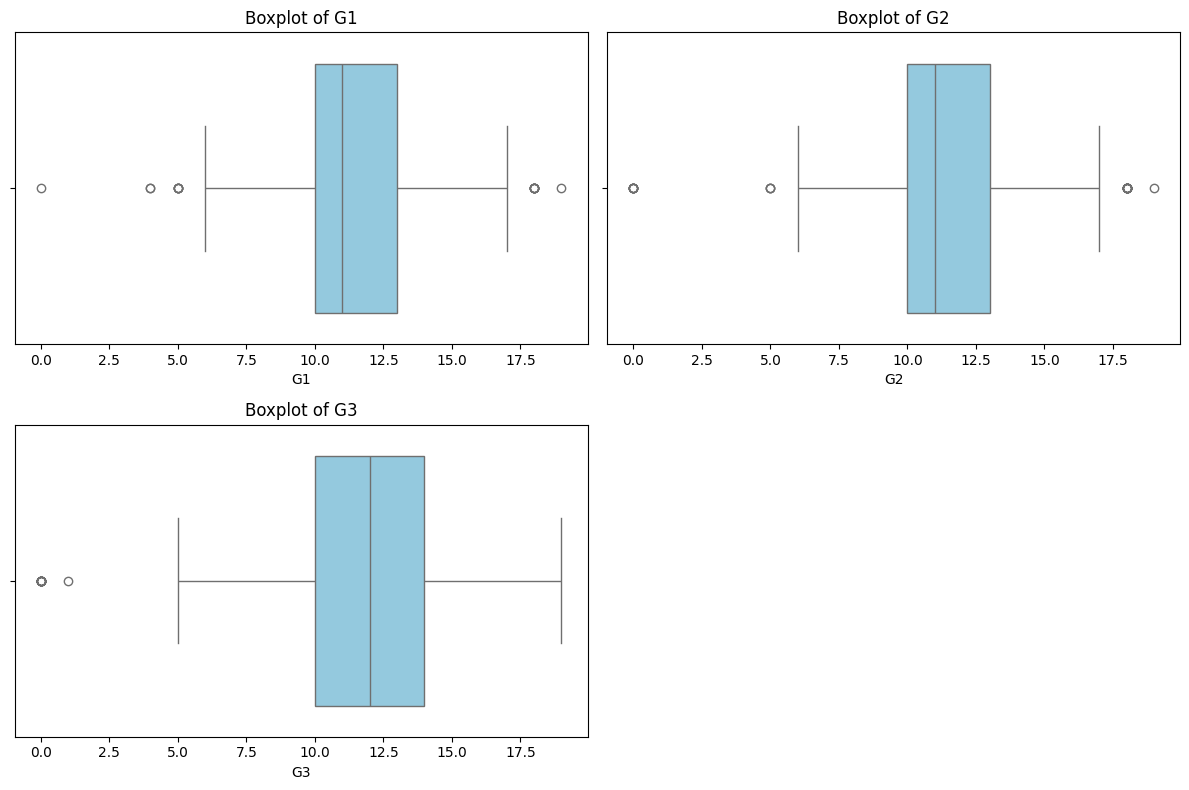

In [17]:
plot_outliers_boxplots(y)

So looking at the target features , there seemes to be no issue since they are withtin the range of 0-20 which is stated in the 'variable_info' in the metadata. Yes there is some outliers but they are logical since students can get a zero or get a below average score therfore the target dataframe stays as is.

Data Quality Report Can be found in the Reports Folder

### Data Transformation

First step in Data Transformation is Encoding 
I wil use one-hot encoding for categorical and binary features

In [18]:
Categorical_columns=['school','address','famsize','Pstatus','Mjob','Fjob','reason','guardian']
binary_columns=['sex','schoolsup','famsup','paid','activities','nursery','higher','internet','romantic']


First let's handle the binary features

In [19]:
for col in binary_columns:
    X[col]=X[col].map({"yes":1,"no":0}).fillna(X[col])
    if col=="sex":
        X[col]=X[col].map({"F":0,"M":1})

Now onto the categorical features

In [20]:
X=pd.get_dummies(X,columns=Categorical_columns,drop_first=True)

In [21]:
X.head()

,sex,age,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,...,Mjob_teacher,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_home,reason_other,reason_reputation,guardian_mother,guardian_other
0,0,18,4,4,2,2,0,1,0,0,...,False,False,False,False,True,False,False,False,True,False
1,0,17,1,1,1,2,0,0,1,0,...,False,False,True,False,False,False,False,False,False,False
2,0,15,1,1,1,2,0,1,0,0,...,False,False,True,False,False,False,True,False,True,False
3,0,15,4,2,1,3,0,0,1,0,...,False,False,False,True,False,True,False,False,True,False
4,0,16,3,3,1,2,0,0,1,0,...,False,False,True,False,False,True,False,False,False,False


Now that the encoding is settled , let's go on to scaling for numeric features. Since I will be using KNN it is important for all the numeric features to be scaled

In [22]:
from sklearn.preprocessing import StandardScaler
numeric_features=['age','Medu','Fedu','traveltime','studytime','failures','famrel','freetime','goout','Dalc','Walc','health','absences']
scaler=StandardScaler()
X[numeric_features]=scaler.fit_transform(X[numeric_features])
X[numeric_features].head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences
0,1.031695,1.310216,1.540715,0.576718,0.083653,-0.374305,0.072606,-0.171647,0.693785,-0.543555,-0.997695,-0.371042,0.166182
1,0.210137,-1.336039,-1.188832,-0.760032,0.083653,-0.374305,1.119748,-0.171647,-0.157380,-0.543555,-0.997695,-0.371042,-0.367739
2,-1.432980,-1.336039,-1.188832,-0.760032,0.083653,-0.374305,0.072606,-0.171647,-1.008546,0.538553,0.560678,-0.371042,0.700102
3,-1.432980,1.310216,-0.278983,-0.760032,1.290114,-0.374305,-0.974536,-1.123771,-1.008546,-0.543555,-0.997695,1.012903,-0.901659
4,-0.611422,0.428131,0.630866,-0.760032,0.083653,-0.374305,0.072606,-0.171647,-1.008546,-0.543555,-0.218508,1.012903,-0.901659


Now all the values range from -3 to +3

Now We can go on to feature engineering.
We will do two things 
1. Average of G1-G3 
2. Attendance Rate
3. Family academic Enviroment
4. Support Index
5. Lifestyle Score
6. Risk Group 

In [23]:
X["G1"]=y['G1']
X['G2']=y['G2']
X['G3']=y['G3']

Attendence Rate

In [24]:
X["attendance_rate"] = 1 - (X_original['absences'] / X_original['absences'].max())
X['attendance_rate']

0      0.8750
1      0.9375
2      0.8125
3      1.0000
4      1.0000
        ...  
644    0.8750
645    0.8750
646    0.8125
647    0.8125
648    0.8750
Name: attendance_rate, Length: 649, dtype: float64

Risk Group (for classification)

In [25]:
def risk_group(g3):
    if g3<=9: return "High"
    if g3<=14: return "Medium"
    return "Low"
X['risk_group']=y['G3'].apply(risk_group)

Average of G1-G3

In [26]:
X['avg_grade']=(X['G1']+X['G2']+X['G3'])/3

Now we need to consider leakage 
having G1 and G2 would make it easy for the model to predict G3 and can cause leakage 
so to surpass this we will have 2 dataframes 
one with G1 and G2 
nd one without G1 and G2

In [27]:
df_with=X.drop(columns=['G3','risk_group'])
df_with

,sex,age,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,...,Fjob_teacher,reason_home,reason_other,reason_reputation,guardian_mother,guardian_other,G1,G2,attendance_rate,avg_grade
0,0,1.031695,1.310216,1.540715,0.576718,0.083653,-0.374305,1,0,0,...,True,False,False,False,True,False,0,11,0.8750,7.333333
1,0,0.210137,-1.336039,-1.188832,-0.760032,0.083653,-0.374305,0,1,0,...,False,False,False,False,False,False,9,11,0.9375,10.333333
2,0,-1.432980,-1.336039,-1.188832,-0.760032,0.083653,-0.374305,1,0,0,...,False,False,True,False,True,False,12,13,0.8125,12.333333
3,0,-1.432980,1.310216,-0.278983,-0.760032,1.290114,-0.374305,0,1,0,...,False,True,False,False,True,False,14,14,1.0000,14.000000
4,0,-0.611422,0.428131,0.630866,-0.760032,0.083653,-0.374305,0,1,0,...,False,True,False,False,False,False,11,13,1.0000,12.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,0,1.853254,-0.453954,0.630866,-0.760032,1.290114,1.312667,0,0,0,...,False,False,False,False,True,False,10,11,0.8750,10.333333
645,0,1.031695,0.428131,-1.188832,-0.760032,0.083653,-0.374305,0,1,0,...,False,False,False,False,True,False,15,15,0.8750,15.333333
646,0,1.031695,-1.336039,-1.188832,0.576718,0.083653,-0.374305,0,0,0,...,False,False,False,False,True,False,11,12,0.8125,10.666667
647,1,0.210137,0.428131,-1.188832,0.576718,-1.122808,-0.374305,0,0,0,...,False,False,False,False,True,False,10,10,0.8125,10.000000


In [28]:
drop_cols=["G1",'G2','G3','avg_grade','risk_group']
df_without=X.drop(columns=[c for c in drop_cols if c in X.columns])
df_without

,sex,age,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,...,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_home,reason_other,reason_reputation,guardian_mother,guardian_other,attendance_rate
0,0,1.031695,1.310216,1.540715,0.576718,0.083653,-0.374305,1,0,0,...,False,False,False,True,False,False,False,True,False,0.8750
1,0,0.210137,-1.336039,-1.188832,-0.760032,0.083653,-0.374305,0,1,0,...,False,True,False,False,False,False,False,False,False,0.9375
2,0,-1.432980,-1.336039,-1.188832,-0.760032,0.083653,-0.374305,1,0,0,...,False,True,False,False,False,True,False,True,False,0.8125
3,0,-1.432980,1.310216,-0.278983,-0.760032,1.290114,-0.374305,0,1,0,...,False,False,True,False,True,False,False,True,False,1.0000
4,0,-0.611422,0.428131,0.630866,-0.760032,0.083653,-0.374305,0,1,0,...,False,True,False,False,True,False,False,False,False,1.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,0,1.853254,-0.453954,0.630866,-0.760032,1.290114,1.312667,0,0,0,...,False,True,False,False,False,False,False,True,False,0.8750
645,0,1.031695,0.428131,-1.188832,-0.760032,0.083653,-0.374305,0,1,0,...,False,False,True,False,False,False,False,True,False,0.8750
646,0,1.031695,-1.336039,-1.188832,0.576718,0.083653,-0.374305,0,0,0,...,False,True,False,False,False,False,False,True,False,0.8125
647,1,0.210137,0.428131,-1.188832,0.576718,-1.122808,-0.374305,0,0,0,...,False,False,True,False,False,False,False,True,False,0.8125


In [29]:
#Classification
y_with_cls=X['risk_group']
y_without_cls=X['risk_group']
#Regression 
y_with_rg=X['G3']
y_without_rg=X['G3']

Ok let's confirm we actually did this step correctly

In [30]:
df_with.columns.tolist()

['sex',
 'age',
 'Medu',
 'Fedu',
 'traveltime',
 'studytime',
 'failures',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic',
 'famrel',
 'freetime',
 'goout',
 'Dalc',
 'Walc',
 'health',
 'absences',
 'school_MS',
 'address_U',
 'famsize_LE3',
 'Pstatus_T',
 'Mjob_health',
 'Mjob_other',
 'Mjob_services',
 'Mjob_teacher',
 'Fjob_health',
 'Fjob_other',
 'Fjob_services',
 'Fjob_teacher',
 'reason_home',
 'reason_other',
 'reason_reputation',
 'guardian_mother',
 'guardian_other',
 'G1',
 'G2',
 'attendance_rate',
 'avg_grade']

In [31]:
df_without.columns.tolist()

['sex',
 'age',
 'Medu',
 'Fedu',
 'traveltime',
 'studytime',
 'failures',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic',
 'famrel',
 'freetime',
 'goout',
 'Dalc',
 'Walc',
 'health',
 'absences',
 'school_MS',
 'address_U',
 'famsize_LE3',
 'Pstatus_T',
 'Mjob_health',
 'Mjob_other',
 'Mjob_services',
 'Mjob_teacher',
 'Fjob_health',
 'Fjob_other',
 'Fjob_services',
 'Fjob_teacher',
 'reason_home',
 'reason_other',
 'reason_reputation',
 'guardian_mother',
 'guardian_other',
 'attendance_rate']

Here are the G3 grades but as categories with the previous function risk_group

In [32]:
y_with_cls.head()

0    Medium
1    Medium
2    Medium
3    Medium
4    Medium
Name: risk_group, dtype: object

In [33]:
y_without_cls.head()

0    Medium
1    Medium
2    Medium
3    Medium
4    Medium
Name: risk_group, dtype: object

Here are the G3 grades (actual values )

In [34]:
y_without_rg.head()

0    11
1    11
2    12
3    14
4    13
Name: G3, dtype: int64

In [35]:
y_with_rg.head()

0    11
1    11
2    12
3    14
4    13
Name: G3, dtype: int64

In [36]:
"avg_grade" in df_with.columns

True

In [37]:
"avg_grade" in df_without.columns

False

In [38]:
df_with.shape

(649, 43)

In [39]:
df_without.shape

(649, 40)

All of the sanity checks are correct. Now the dataset is ready for EDA and visualization 

### EDA

Now We will try to explore the data even more. For EDA I will use a merged df with the original features and the target variables called df_corr

In [40]:
df_corr=X_original.copy()
df_corr['G1']=y['G1']
df_corr['G2']=y['G2']
df_corr['G3']=y['G3']
num_features=numeric_features+['G1','G2','G3']

In [42]:
df_corr.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

Let's start with descriptive stats table for the  numeric features

In [43]:
num_summary=(
    df_corr[num_features].describe(percentiles=[0.25,0.5,0.75])
    .T
    .rename(columns={'25%':'q1','50%':'q2','75%':'q3'})
    .round(2)
)
num_summary

,count,mean,std,min,q1,q2,q3,max
age,649.0,16.74,1.22,15.0,16.0,17.0,18.0,22.0
Medu,649.0,2.51,1.13,0.0,2.0,2.0,4.0,4.0
Fedu,649.0,2.31,1.10,0.0,1.0,2.0,3.0,4.0
traveltime,649.0,1.57,0.75,1.0,1.0,1.0,2.0,4.0
studytime,649.0,1.93,0.83,1.0,1.0,2.0,2.0,4.0
failures,649.0,0.22,0.59,0.0,0.0,0.0,0.0,3.0
famrel,649.0,3.93,0.96,1.0,4.0,4.0,5.0,5.0
freetime,649.0,3.18,1.05,1.0,3.0,3.0,4.0,5.0
goout,649.0,3.18,1.18,1.0,2.0,3.0,4.0,5.0
Dalc,649.0,1.50,0.92,1.0,1.0,1.0,2.0,5.0


And let's not forget the categorical features

In [44]:
cat_summary=pd.DataFrame({
    'unique_values':df_corr[Categorical_columns].nunique(),
    'most_frequent':df_corr[Categorical_columns].mode().iloc[0],
    'freq_count':df_corr[Categorical_columns].apply(lambda x:x.value_counts().iloc[0]),
                        })
cat_summary['freq_percent']=(cat_summary['freq_count']/len(df_corr)*100).round(2)
cat_summary

,unique_values,most_frequent,freq_count,freq_percent
school,2,GP,423,65.18
address,2,U,452,69.65
famsize,2,GT3,457,70.42
Pstatus,2,T,569,87.67
Mjob,5,other,258,39.75
Fjob,5,other,367,56.55
reason,4,course,285,43.91
guardian,3,mother,455,70.11


Now let's do Correlation analysis
notice that this will be done for the numeric features only 

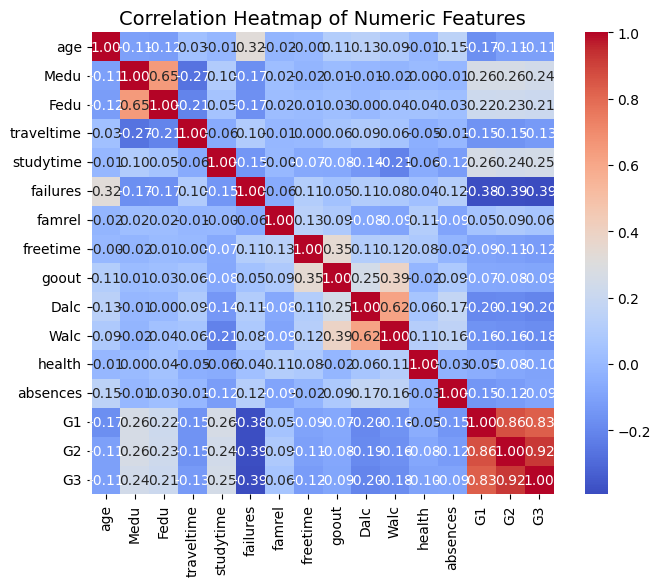

In [45]:
corr=df_corr[num_features].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr,annot=True,fmt=".2f",cmap="coolwarm",cbar=True,square=True)
plt.title("Correlation Heatmap of Numeric Features",fontsize=14)
plt.show()

Ok so looks like G3 has a  strong positive correlation with G1(0.83) and G2(0.92)
it looks like it has a strong negative correlation failures (-0.39) which means the more failures the lower the value of G3.
Suprisingly, Study time has a weak positive correlation and absences has a very weak or no correlation.
So the important predictors for G3 is G1 , G2 and failures.


Now let's do Group Comparisons 
- Study time vs outcomes 
- absences vs outcomes 
- School support vs outcomes 
- failures vs outcomes
- sex vs outcomes 
- lifestyle score vs outcomes

Study time vs outcomes

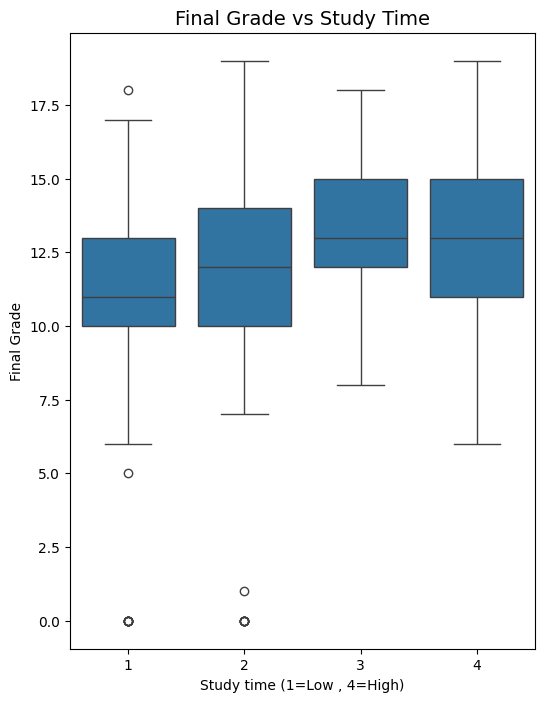

In [46]:
plt.figure(figsize=(6,8))
sns.boxplot(x='studytime',y='G3',data=df_corr)
plt.title("Final Grade vs Study Time",fontsize=14)
plt.xlabel("Study time (1=Low , 4=High)")
plt.ylabel("Final Grade")
plt.show()

So there is a slight difference between different study times and final grade  but it isn't that strong.

Absences vs outcomes

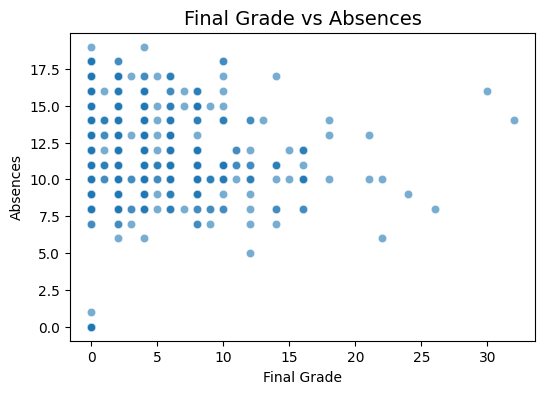

In [47]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='absences',y='G3',data=df_corr,alpha=0.6)
plt.title("Final Grade vs Absences",fontsize=14)
plt.ylabel("Absences")
plt.xlabel("Final Grade")
plt.show()

Looks like most points are clusterd around low absences (0-15) and final grades (5-15), however there is a weak negative correlation and the relationship is not that strong

School Support vs outcomes

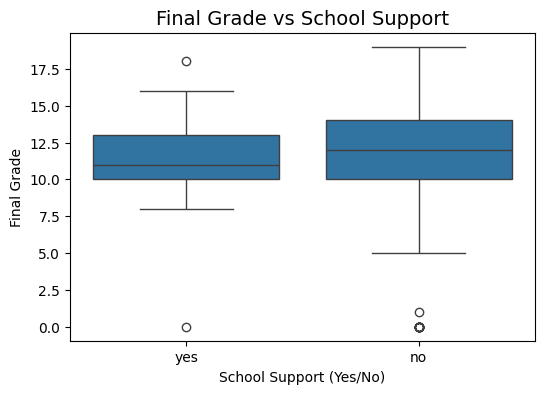

In [48]:
plt.figure(figsize=(6,4))
sns.boxplot(x='schoolsup',y='G3',data=df_corr)
plt.title("Final Grade vs School Support",fontsize=14)
plt.xlabel("School Support (Yes/No)")
plt.ylabel("Final Grade")
plt.show()

Students with no support are performing slightly higher (likely because students with support are already at risk)
So when thinking about it , students with suport are performing slighly better but still it is not that significant

Failures vs Outcomes

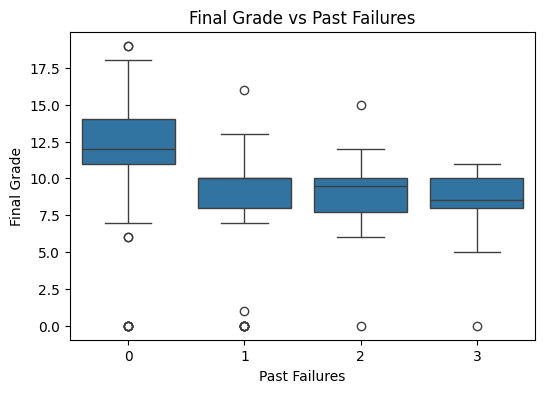

In [49]:
plt.figure(figsize=(6,4))
sns.boxplot(x='failures',y='G3',data=df_corr)
plt.title("Final Grade vs Past Failures")
plt.xlabel("Past Failures")
plt.ylabel("Final Grade")
plt.show()

Here there is a clear negative correlation as faiulres increase , the final grade decreases 

Sex vs Outcomes

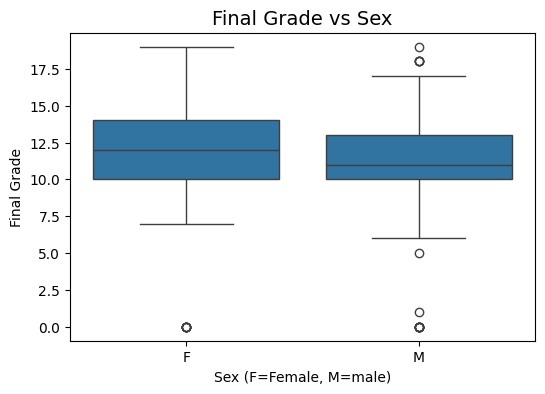

In [50]:
plt.figure(figsize=(6,4))
sns.boxplot(x='sex',y='G3',data=df_corr)
plt.title("Final Grade vs Sex",fontsize=14)
plt.xlabel("Sex (F=Female, M=male)")
plt.ylabel("Final Grade")
plt.show()

In [51]:
df_corr.groupby('sex')['G3'].mean().round(2)

sex
F    12.25
M    11.41
Name: G3, dtype: float64

Looks like female are slightly overperforming but it is still not that significant

Lifestyle score vs outcomes
(Lifestyle score will combine the scores of goout, health and freetime)

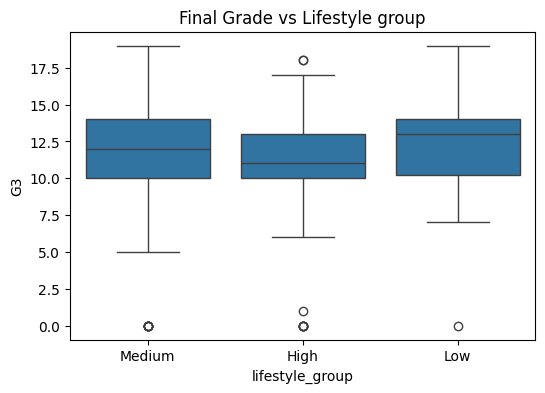

In [52]:
df_corr['Lifestyle_score']=(df_corr['goout'] + df_corr['freetime'] + df_corr['health'])/3
def categorize_lifestyle(score):
    if score <2.5: 
        return 'Low'
    elif score <3.5:
        return 'Medium'
    else:
        return 'High'

df_corr['lifestyle_group']=df_corr['Lifestyle_score'].apply(categorize_lifestyle)
plt.figure(figsize=(6,4))
sns.boxplot(x='lifestyle_group',y='G3',data=df_corr)
plt.title("Final Grade vs Lifestyle group")
plt.show()


Let's calculate the mean to get a good feel about the data 

In [53]:
df_corr.groupby('lifestyle_group')['G3'].mean().round(2)

lifestyle_group
High      11.41
Low       12.51
Medium    12.15
Name: G3, dtype: float64

so there is not much of a difference between them and looks like they are not strong indicators of the final grade

Hypotheses 
1. Absences are negatively correlated with final grades 
   Evidence: The heatmap shows -0.09
   The scatter plot shows no direct relation 
   Conclusion: Hypothesis Supported but weak effect
2. Students with more past failures have lower final grades
   Evidence: the heatmap shows a correlation of -0.39 
   Students with more than 2 failures have lower grades from the box plot 
   Conclusion: Hypothesis Supported with failures being a meaningful predictor
3. Sex isn't correlated to final grade
   Evidence:The boxplot is not that different 
   Means are not that different 
   Conclusion: Hypothesis Supported
4. Study time is strongly correlated to final grade
    Evidence: After 2 hours , there is not that much of a difference. 
    Conclusion: Hypothesis Rejected (Weak effect)
5. Students with  no school support  outperform students with school support
    Evidence: Although the boxplot of students with no school support has better boxplot but when thinking about it school support is for students who actually need it. 
    Conclusion: Hypothesis Rejected

Before going on to the next module , for a one line summary 
acadmic history is far more infleunetial on final outcomes than behavioral , demographic , or support-related factors

### Visualization

Above in the EDA , I already did the correlation heatmap,scatter plot of absences with interpertation, boxplot of studytime and boxplot of schoolsup ,  but I will put it here for simplicity.

Final Grade vs Absencess

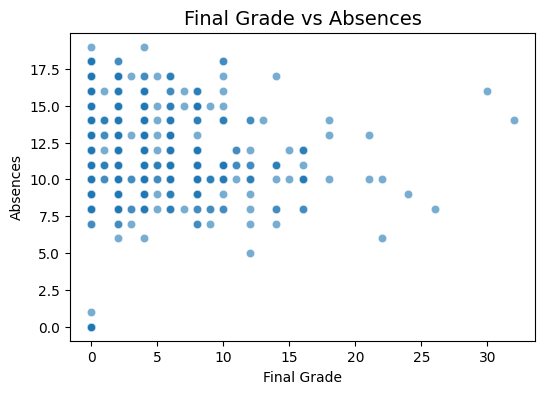

In [54]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='absences',y='G3',data=df_corr,alpha=0.6)
plt.title("Final Grade vs Absences",fontsize=14)
plt.ylabel("Absences")
plt.xlabel("Final Grade")
plt.show()

Correlation Heatmap

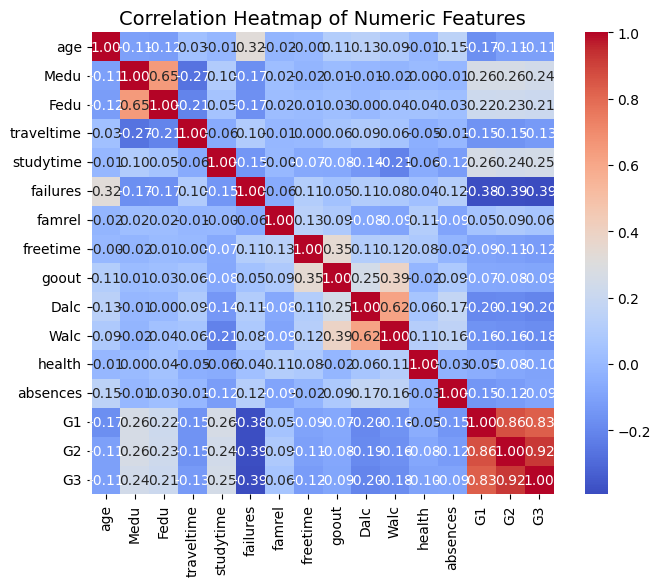

In [55]:
corr=df_corr[num_features].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr,annot=True,fmt=".2f",cmap="coolwarm",cbar=True,square=True)
plt.title("Correlation Heatmap of Numeric Features",fontsize=14)
plt.show()

Boxplot of school support vs final grade

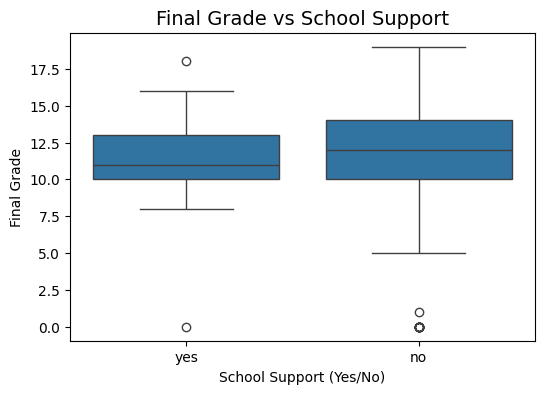

In [56]:
plt.figure(figsize=(6,4))
sns.boxplot(x='schoolsup',y='G3',data=df_corr)
plt.title("Final Grade vs School Support",fontsize=14)
plt.xlabel("School Support (Yes/No)")
plt.ylabel("Final Grade")
plt.show()

Histogram of 3+ numeric variables 

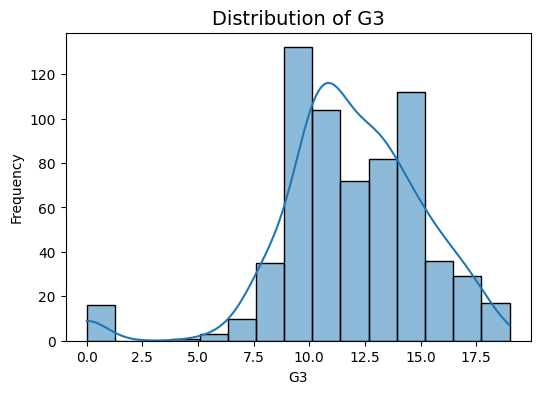

In [57]:
plt.figure(figsize=(6,4))
sns.histplot(df_corr['G3'],bins=15,kde=True)
plt.title(f"Distribution of G3",fontsize=14)
plt.xlabel('G3')
plt.ylabel("Frequency")
plt.show()

So Final grade distribution looks rightly skewed and most grades range from 10 to 15

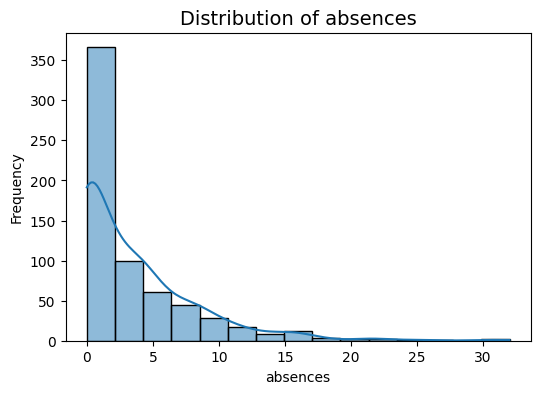

In [58]:
plt.figure(figsize=(6,4))
sns.histplot(df_corr['absences'],bins=15,kde=True)
plt.title(f"Distribution of absences",fontsize=14)
plt.xlabel('absences')
plt.ylabel("Frequency")
plt.show()


Looks like most students don't miss classes as 0 is the most frequent value

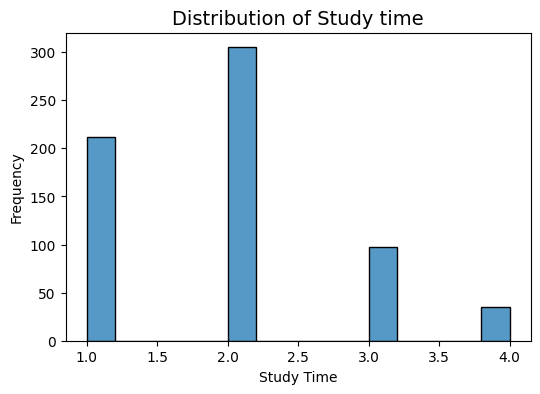

In [59]:
plt.figure(figsize=(6,4))
sns.histplot(df_corr['studytime'],bins=15)
plt.title("Distribution of Study time",fontsize=14)
plt.xlabel("Study Time")
plt.ylabel("Frequency")
plt.show()

So looks like most students study between 2 hours to 2.25 hours 

### Unsupervised Learning (K-Means)

As K-means is an unsupervised clustering algorithm, we will  create a feature set for behavior segmentation (which means academics don't matter here , so we will use the df_without and y_without )

In [60]:
df_without.columns

Index(['sex', 'age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures',
       'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher',
       'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc',
       'health', 'absences', 'school_MS', 'address_U', 'famsize_LE3',
       'Pstatus_T', 'Mjob_health', 'Mjob_other', 'Mjob_services',
       'Mjob_teacher', 'Fjob_health', 'Fjob_other', 'Fjob_services',
       'Fjob_teacher', 'reason_home', 'reason_other', 'reason_reputation',
       'guardian_mother', 'guardian_other', 'attendance_rate'],
      dtype='object')

Feature set for behavior segmentation

In [61]:
behavioral_features=['studytime','absences','goout','freetime','famsup','schoolsup']

Elbow Method

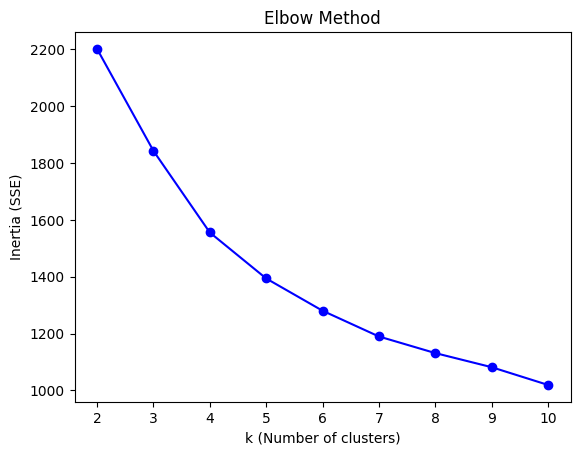

In [62]:
from sklearn.cluster import KMeans
X=df_without[behavioral_features]
inertia=[]
K=range(2,11)
for k in K:
    kmeans=KMeans(n_clusters=k,random_state=43,n_init=10)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
plt.plot(K,inertia,'bo-')
plt.xlabel('k (Number of clusters)')
plt.ylabel('Inertia (SSE)')
plt.title('Elbow Method')
plt.show()
    

According to the elbow method, a good number of clusters would be 6 

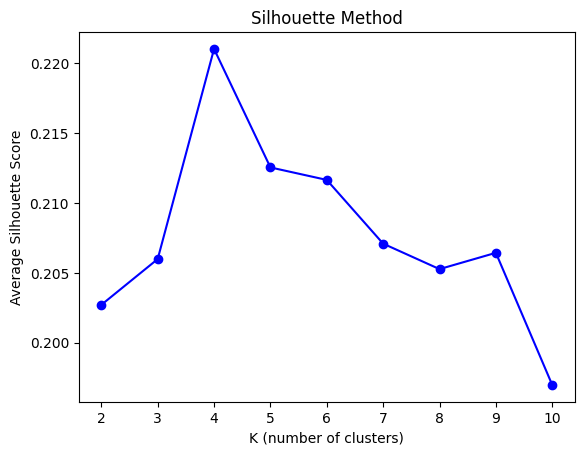

In [63]:
from sklearn.metrics import silhouette_score
silhouette=[]
for k in K:
    kmeans=KMeans(n_clusters=k,random_state=42,n_init=10)
    labels=kmeans.fit_predict(X)
    silhouette.append(silhouette_score(X,labels))
plt.plot(K,silhouette,'-bo')
plt.xlabel('K (number of clusters)')
plt.ylabel('Average Silhouette Score')
plt.title('Silhouette Method')
plt.show()

For silhouette method , the best K is 4 
The difference between elbow method and silhouette score is that elbow method favors more clusters since it measures how well points fit within clusters , yet the silhouette score balances cohesion vs sepration which means clusters are best seperated and consistent at the k with the highest silhouette score. We will cluster at k=4 and k=6 and look at the difference between clusters

In [89]:
results = {}

for k in [4, 6]:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X)   
    
    df_temp = df_without.copy()
    df_temp[f'cluster_{k}'] = labels
    
    cluster_profile = df_temp.groupby(f'cluster_{k}').agg(
        size=(f'cluster_{k}', 'size'),
        avg_studytime=('studytime', 'mean'),
        avg_absences=('absences', 'mean'),
        avg_goout=('goout', 'mean'),
        avg_freetime=('freetime', 'mean'),
        avg_famsup=('famsup', 'mean'),
        avg_schoolsup=('schoolsup', 'mean')
    ).reset_index()
    
    results[k] = cluster_profile

print("K=4 Clusters:\n")
results[4]

K=4 Clusters:



,cluster_4,size,avg_studytime,avg_absences,avg_goout,avg_freetime,avg_famsup,avg_schoolsup
0,0,122,-0.470133,0.651961,0.854251,0.483915,0.557377,0.065574
1,1,144,-0.100668,0.073487,-0.772111,-0.839456,0.555556,0.118056
2,2,203,0.214402,-0.169162,-0.174152,-0.082531,0.724138,0.123153
3,3,180,0.157381,-0.309897,0.235101,0.436655,0.572222,0.100000


In [91]:
mean_abs = X_original['absences'].mean()
std_abs = X_original['absences'].std()

results[4]['actual_absences'] = results[4]['avg_absences'] * std_abs + mean_abs

results[4]['actual_absences']

0    6.685072
1    4.000512
2    2.874435
3    2.221318
Name: actual_absences, dtype: float64

let's analyze clusters 
- Cluster 0:low studytime , low absences and low solializing -> Quiet/Average students
- Cluster 1:high absences, moderate goout and low studytime -> The skippers
- Cluster 2:very high study time , low absences, low social-> Diligent Students
- Cluster 3->low studytime , low abences , but very high goout and freetime -> Social/Party Group


In [65]:
print("\nK=6 Clusters:\n")
results[6]


K=6 Clusters:



,cluster_6,size,avg_studytime,avg_absences,avg_goout,avg_freetime,avg_famsup,avg_schoolsup
0,0,82,-0.416587,-0.468662,-0.624483,-1.495332,0.451220,0.097561
1,1,165,-0.340437,-0.497174,-0.626811,0.336153,0.642424,0.121212
2,2,142,-0.341157,-0.484299,1.101385,0.606146,0.563380,0.105634
3,3,112,1.656362,-0.358204,-0.316974,-0.129141,0.696429,0.133929
4,4,76,-0.313209,1.557184,0.962574,0.630143,0.605263,0.052632
5,5,72,-0.318501,1.541768,-0.547498,-0.727053,0.708333,0.083333


- Cluster 0: very low studytime , very low absences , very low freetime->Quiet students
- Cluster 1:low studytime,low absences, low goout , moderate freetime-> Quiet Students 2
- Cluster 2: low studytime, low absences, very high goout/freetime -> Social party group 
- Cluster 3:very high studytime , low absences, low goout-> Diligent Students
- Cluster 4 :low studytime , very high absences ,High goout/freetime-> The skippers
- Cluster 5: low study time, very high absences , low goout/freetime-> The skippers 2

Notice how the clusters are repeated when k was 6. ( 2 Groups for skippers and 2 groups for quiet)
K=4 is the better option since each group represents a clear behavioral archetype and are better seperated.

In [66]:
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
labels = kmeans.fit_predict(X)   
    
df_temp = df_without.copy()
df_temp[f'cluster_{4}'] = labels
df_temp['G3']=y_with_rg
    
cluster_profile = df_temp.groupby(f'cluster_4').agg(
        size=(f'cluster_4', 'size'),
        avg_studytime=('studytime', 'mean'),
        avg_absences=('absences', 'mean'),
        avg_goout=('goout', 'mean'),
        avg_freetime=('freetime', 'mean'),
        avg_famsup=('famsup', 'mean'),
        avg_schoolsup=('schoolsup', 'mean'),
        avg_G3=('G3','mean')
    ).reset_index()
    

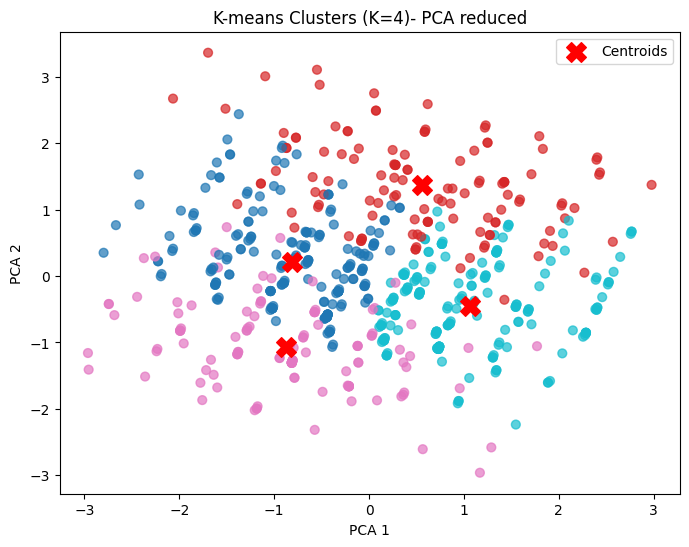

In [67]:
from sklearn.decomposition import PCA
kmeans=KMeans(n_clusters=4,random_state=42,n_init=10)
labels=kmeans.fit_predict(X)
pca=PCA(n_components=2,random_state=42)
x_pca=pca.fit_transform(X)
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=labels,cmap='tab10',s=40,alpha=0.7)
centers_pca=pca.transform(kmeans.cluster_centers_)
plt.scatter(centers_pca[:,0],centers_pca[:,1],c='red',marker='X',s=200,label='Centroids')
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("K-means Clusters (K=4)- PCA reduced")
plt.legend()
plt.show()

Here this is a visualization for cluters. Notice that they do overlap as PCA reduces multi-dimensional behavioral features (6D) into two dimesnions (2D), yet each cluster is meaningfully distinct in terms of their centroids and average behaviors

In [68]:
g3_comparison = df_temp.groupby('cluster_4')['G3'].mean()

Compare  average G3 across clusters

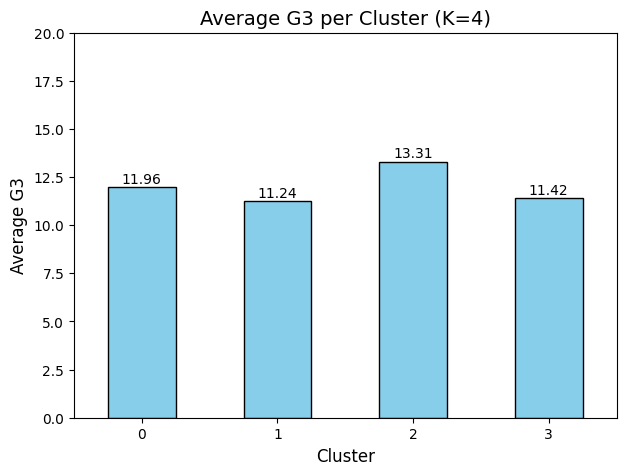

In [69]:
plt.figure(figsize=(7,5))
g3_comparison.plot(kind='bar',color='skyblue',edgecolor='black')
plt.title("Average G3 per Cluster (K=4)",fontsize='14')
plt.xlabel("Cluster",fontsize=12)
plt.ylabel("Average G3",fontsize=12)
plt.xticks(rotation=0)
plt.ylim(0,20)
for i, val in enumerate(g3_comparison):
    plt.text(i,val+0.2,f"{val:.2f}",ha='center',fontsize=10)
plt.show()


So looks like Cluster 2 (The diligent students) has the highes average G3 grade and they clearly perform best. 
Morever Cluster 1 (The skippers) have the least performance which links skipping class to poor outcomes.
Finally Clusters 0 and 3 are middle-of-the-road students with cluster 3 being more socially active.

### Supervised Learning

Define Target: it will be a 3-class risk that was already created using the function risk_group

Train at least 3 algorithms 
I will use 
- Random Forest
- Logistic Regressoin 
- Decision Tree


but first we split the data 
for each algorithm there is a pipeline that will be followed 
1. Train the model 
2. Use cross validation and perform basic hyperparameter tuning 
3. Report full metrics
4. Interpret Model 

Finally a table will be created at the end to be able to see the differences.
We also need to make sure that this is done for the two data-leakage variants

Dataset with G1 and G2

In [70]:
from sklearn.model_selection import train_test_split
#stratify here keeps class balance
X_train,X_test,y_train,y_test=train_test_split(df_with,y_with_cls,test_size=0.2,random_state=42,stratify=y_with_cls)

In [71]:
X_train.shape

(519, 43)

In [72]:
X_test.shape

(130, 43)

In [73]:
y_train.shape

(519,)

In [74]:
y_test.shape

(130,)

In [75]:
df_with.head()

,sex,age,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,...,Fjob_teacher,reason_home,reason_other,reason_reputation,guardian_mother,guardian_other,G1,G2,attendance_rate,avg_grade
0,0,1.031695,1.310216,1.540715,0.576718,0.083653,-0.374305,1,0,0,...,True,False,False,False,True,False,0,11,0.8750,7.333333
1,0,0.210137,-1.336039,-1.188832,-0.760032,0.083653,-0.374305,0,1,0,...,False,False,False,False,False,False,9,11,0.9375,10.333333
2,0,-1.432980,-1.336039,-1.188832,-0.760032,0.083653,-0.374305,1,0,0,...,False,False,True,False,True,False,12,13,0.8125,12.333333
3,0,-1.432980,1.310216,-0.278983,-0.760032,1.290114,-0.374305,0,1,0,...,False,True,False,False,True,False,14,14,1.0000,14.000000
4,0,-0.611422,0.428131,0.630866,-0.760032,0.083653,-0.374305,0,1,0,...,False,True,False,False,False,False,11,13,1.0000,12.333333


Now that we have 3 models and 2 datasets to train we are going to build a function called evaluate_model which will train the model , evaluate it on test data and returns a dictionary of metrics. 
We will also run GridSearch for all the models to get the best values for the hyper-parameters


In [76]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.model_selection import cross_val_score
def evaluate_model(model,X_train,X_test,y_train,y_test,cv=5):
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    metrics={
        "accuracy":accuracy_score(y_test,y_pred),
        "precision_score_macro":precision_score(y_test,y_pred,average="macro"),
        "recall_score_macro":recall_score(y_test,y_pred,average="macro"),
        "f1_score_macro":f1_score(y_test,y_pred,average="macro"),
        "cv_score_macro":np.mean(cross_val_score(model,X_train,y_train,cv=cv,scoring="f1_macro"))
    }
    return metrics

In [101]:
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split

tuning_results = {"df_with": {}, "df_without": {}}
results = {"df_with": {}, "df_without": {}}

datasets = {
    "df_with": (df_with, y_with_cls),
    "df_without": (df_without, y_without_cls)
}

param_grids = { 
    "LogisticRegression": {"C": [0.01, 0.1, 1, 10, 100]}, 
    "RandomForest": { 
        "n_estimators": [100, 200, 500], 
        "max_depth": [None, 10, 20], 
        "min_samples_split": [2, 5, 10] 
    }, 
   "DecisionTree": {
        "max_depth": [None, 5, 10, 20],
        "min_samples_split": [2, 5, 10],
        "criterion": ["gini", "entropy"]
    }
}

models = {  
    "LogisticRegression": LogisticRegression(multi_class="multinomial", solver="lbfgs", max_iter=1000, random_state=42),  
    "RandomForest": RandomForestClassifier(random_state=42),  
    "DecisionTree": DecisionTreeClassifier(random_state=42)  
}

for name, (X, y) in datasets.items():  
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )
    
    for model_name, model in models.items(): 
        print(f"Running {model_name} on {name} ...") 
        
        grid = GridSearchCV(
            model, param_grids[model_name], 
            cv=5, scoring="f1_macro", n_jobs=-1
        )
        
        # Train GridSearch
        grid.fit(X_train, y_train)
        
        # Store tuning results
        tuning_results[name][model_name] = {
            "best_params": grid.best_params_,
            "best_cv_f1_macro": grid.best_score_
        }
        
        
        best_model = grid.best_estimator_
        metrics = evaluate_model(best_model, X_train, X_test, y_train, y_test)
        results[name][model_name] = metrics


Running LogisticRegression on df_with ...
Running RandomForest on df_with ...
Running DecisionTree on df_with ...
Running LogisticRegression on df_without ...
Running RandomForest on df_without ...
Running DecisionTree on df_without ...


In [102]:
results

{'df_with': {'LogisticRegression': {'accuracy': 0.9230769230769231,
   'precision_score_macro': 0.945679012345679,
   'recall_score_macro': 0.8625763125763126,
   'f1_score_macro': 0.891267916642022,
   'cv_score_macro': 0.9053756306076206},
  'RandomForest': {'accuracy': 0.9153846153846154,
   'precision_score_macro': 0.9309218559218558,
   'recall_score_macro': 0.8536019536019536,
   'f1_score_macro': 0.8857142857142858,
   'cv_score_macro': 0.9184232100208302},
  'DecisionTree': {'accuracy': 0.9230769230769231,
   'precision_score_macro': 0.9356481481481481,
   'recall_score_macro': 0.8702686202686203,
   'f1_score_macro': 0.8986206896551724,
   'cv_score_macro': 0.912067194327191}},
 'df_without': {'LogisticRegression': {'accuracy': 0.6,
   'precision_score_macro': 0.4752187028657617,
   'recall_score_macro': 0.42612942612942617,
   'f1_score_macro': 0.43540781584259847,
   'cv_score_macro': 0.4861402392147006},
  'RandomForest': {'accuracy': 0.6615384615384615,
   'precision_score

## Model Evaluation and Comparison

In [110]:
tuning_rows = []
for dataset, models in tuning_results.items():
    for model_name, vals in models.items():
        tuning_rows.append({
            "Dataset": dataset,
            "Model": model_name,
            "Best Params": vals["best_params"],
            "Best CV F1": vals["best_cv_f1_macro"]
        })
tuning_df = pd.DataFrame(tuning_rows)

result_rows = []
for dataset, models in results.items():
    for model_name, vals in models.items():
        row = {"Dataset": dataset, "Model": model_name}
        row.update(vals)  
        result_rows.append(row)
results_df = pd.DataFrame(result_rows)

final_df = pd.merge(tuning_df, results_df, on=["Dataset", "Model"])


final_df = final_df[
    ["Dataset", "Model", "Best Params", "Best CV F1",
     "accuracy", "precision_score_macro", "recall_score_macro",
     "f1_score_macro", "cv_score_macro"]
]


for col in ["Best CV F1", "accuracy", "precision_score_macro", 
            "recall_score_macro", "f1_score_macro", "cv_score_macro"]:
    final_df[col] = final_df[col].round(3)


In [111]:
pd.set_option("display.max_colwidth",None)
final_df

,Dataset,Model,Best Params,Best CV F1,accuracy,precision_score_macro,recall_score_macro,f1_score_macro,cv_score_macro
0,df_with,LogisticRegression,{'C': 100},0.905,0.923,0.946,0.863,0.891,0.905
1,df_with,RandomForest,"{'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}",0.918,0.915,0.931,0.854,0.886,0.918
2,df_with,DecisionTree,"{'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 10}",0.912,0.923,0.936,0.870,0.899,0.912
3,df_without,LogisticRegression,{'C': 100},0.486,0.600,0.475,0.426,0.435,0.486
4,df_without,RandomForest,"{'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}",0.415,0.662,0.721,0.397,0.387,0.415
5,df_without,DecisionTree,"{'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 10}",0.495,0.546,0.425,0.425,0.424,0.495


In [108]:
final_df.to_csv("E:/Summer Semester 2/Training/Final Project/Reports/final_df.csv")

With leakage all models perform well with logistic regression achieving the highest precision. Random Forest also outperformes others in CV F1 while DecisionTree is more interpretable.
Yet without leakage the performance drops significantly. Logisitic regression has the better F1 score compared to others , while RandomForest shows high precision but low recall which makes it clear that it predictes fewer positives correctly 
So final observation is that models overfit when leakage exist and removal of leakage allows more generalization

Now we can look for interpretiability 
for logistic regression it would be the coefficients where large  positive coefficents show features strong associated with a specific risk class and large negative coeeficeints reduces the likelihood of that class

In [80]:
def get_top_coeffs(X, y, best_params, dataset_name, top_n=10):
    logreg = LogisticRegression(
        **best_params,
        multi_class="multinomial",
        solver="lbfgs",
        max_iter=1000,
        random_state=42
    )
    logreg.fit(X, y)

    coeffs = pd.DataFrame(
        logreg.coef_.T,
        index=X.columns,
        columns=[f"class_{cls}" for cls in logreg.classes_]
    )

    coeffs_sorted = coeffs.sort_values(by=coeffs.columns[0], ascending=False).head(top_n)
    coeffs_sorted["dataset"] = dataset_name
    return coeffs_sorted

top_with = get_top_coeffs(df_with, y_with_cls, tuning_results["df_with"]["LogisticRegression"]["best_params"], "df_with")
top_without = get_top_coeffs(df_without, y_without_cls, tuning_results["df_without"]["LogisticRegression"]["best_params"], "df_without")

comparison = pd.concat([top_with, top_without])

comparison

,class_High,class_Low,class_Medium,dataset
G1,6.451567,-6.062783,-0.388784,df_with
G2,6.140766,-5.365790,-0.774976,df_with
Fjob_health,2.403389,-2.325048,-0.078341,df_with
Fjob_teacher,2.394833,-1.309361,-1.085472,df_with
school_MS,1.408939,-1.691540,0.282601,df_with
guardian_other,1.272110,-1.420769,0.148659,df_with
attendance_rate,0.905059,-0.025041,-0.880019,df_with
Fjob_other,0.886002,-0.401236,-0.484767,df_with
Fjob_services,0.868777,-0.800547,-0.068230,df_with
paid,0.824133,-0.462990,-0.361143,df_with


In df_with, G1 and G2 strongly and positively influence the probability of being in the High-risk class. The coefficients for these features are much larger than others, suggesting data leakage, as these features dominate the model.
In contrast, for df_without, the coefficients are smaller and more balanced, reflecting more realistic predictors. Here, features like school_MS and schoolsup positively influence High risk, indicating that non-grade-related factors are driving the predictions.

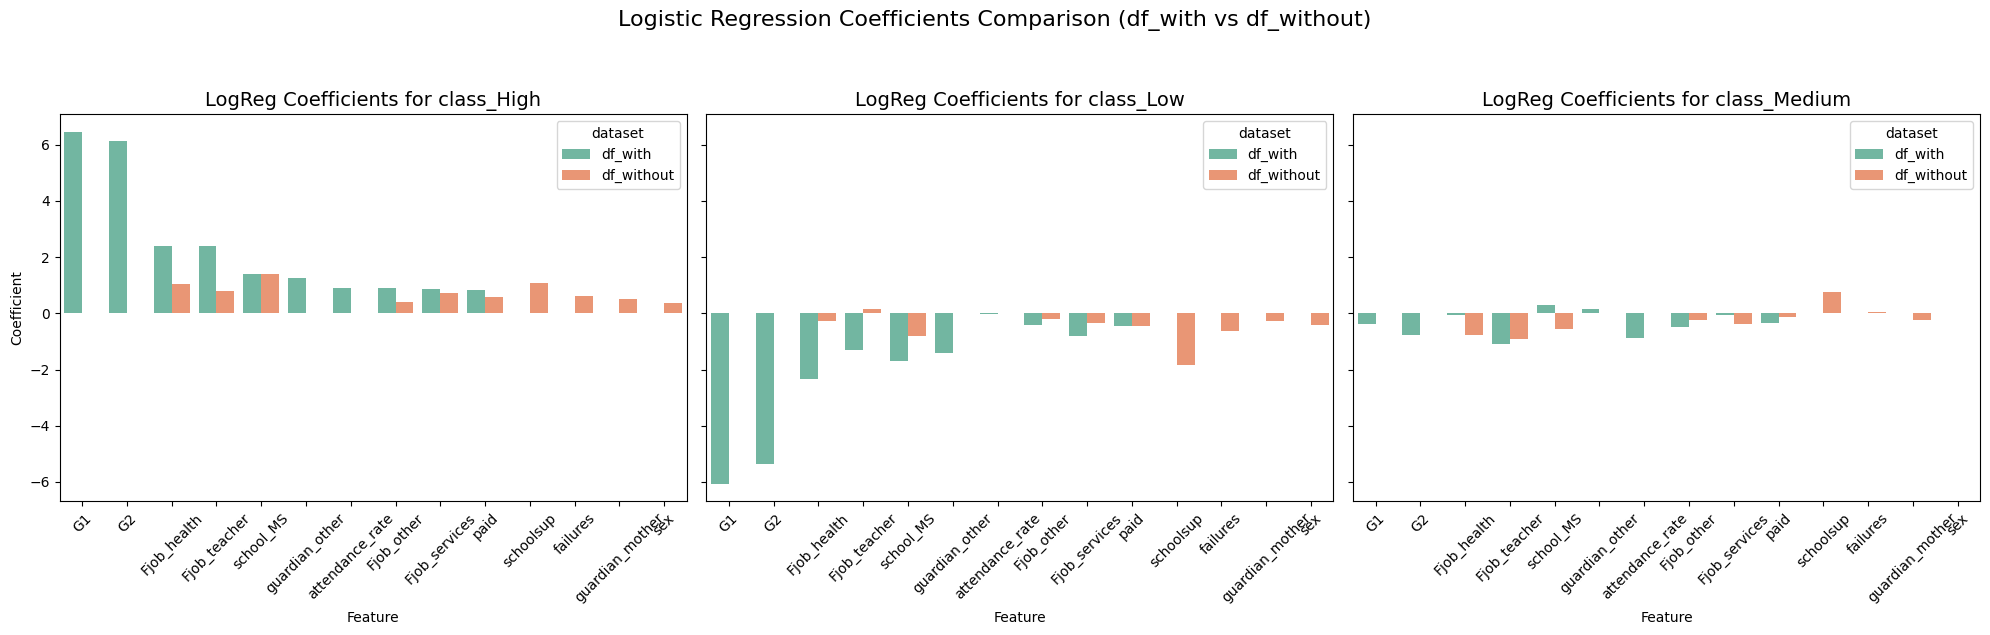

In [81]:
comparison_reset = comparison.reset_index().rename(columns={"index": "Feature"})

fig, axes = plt.subplots(1, 3, figsize=(20,6), sharey=True)

for i, cls in enumerate(["class_High", "class_Low", "class_Medium"]):
    plot_data = comparison_reset[["Feature", cls, "dataset"]].rename(columns={cls: "Coefficient"})
    
    sns.barplot(
        data=plot_data,
        x="Feature",
        y="Coefficient",
        hue="dataset",
        palette="Set2",
        ax=axes[i]
    )
    
    axes[i].set_title(f"LogReg Coefficients for {cls}", fontsize=14)
    axes[i].tick_params(axis="x", rotation=45)

plt.suptitle("Logistic Regression Coefficients Comparison (df_with vs df_without)", fontsize=16, y=1.05)
plt.tight_layout()
plt.show()


Random Forest would have feature importance where features with highest importance are the main drivers of prediction

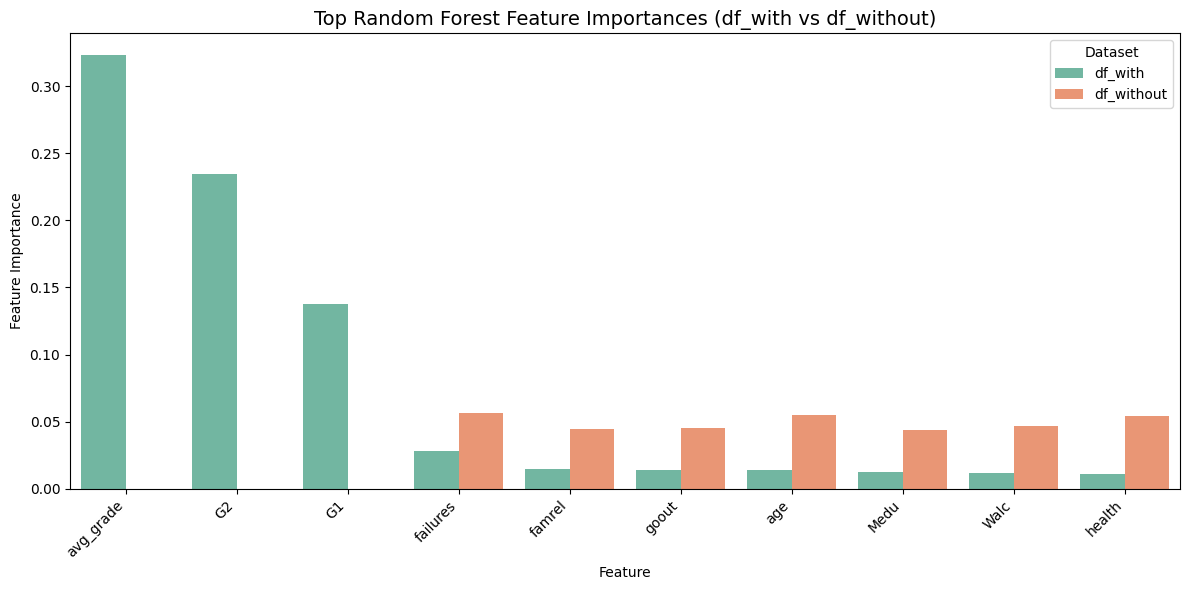

In [82]:
rf_with=RandomForestClassifier(**tuning_results["df_with"]["RandomForest"]["best_params"],random_state=42)
rf_with.fit(df_with,y_with_cls)
importances_with=pd.DataFrame({
    "feature":df_with.columns,
    "importance":rf_with.feature_importances_
}).sort_values("importance",ascending=False)
rf_without=RandomForestClassifier(**tuning_results["df_without"]["RandomForest"]["best_params"],random_state=42)
rf_without.fit(df_without,y_without_cls)
importances_without=pd.DataFrame({
    "feature":df_without.columns,
    "importance":rf_without.feature_importances_
}).sort_values("importance",ascending=False)
importances_with["dataset"] = "df_with"
importances_without["dataset"] = "df_without"


rf_importances = pd.concat([importances_with, importances_without])


top_n = 10
top_features = (
    rf_importances.groupby("feature")["importance"]
    .max()
    .sort_values(ascending=False)
    .head(top_n)
    .index
)
plot_data = rf_importances[rf_importances["feature"].isin(top_features)]


plt.figure(figsize=(12,6))
sns.barplot(
    data=plot_data,
    x="feature",
    y="importance",
    hue="dataset",
    palette="Set2"
)

plt.title("Top Random Forest Feature Importances (df_with vs df_without)", fontsize=14)
plt.xticks(rotation=45, ha="right")
plt.ylabel("Feature Importance")
plt.xlabel("Feature")
plt.legend(title="Dataset")
plt.tight_layout()
plt.show()

The Random Forest feature importance plot shows that in df_with, features like avg_grade and G2 dominate the model, confirming the presence of data leakage, as these grade-related features almost fully determine the prediction.
In contrast, for df_without, the importance is more evenly distributed among features like failures, age, health, and famrel, indicating that the model is now relying on more realistic and meaningful predictors. This demonstrates how removing leakage changes the model’s behavior and improves interpretability.

Now for Decision Tree we can try to visualize the best decision tree created

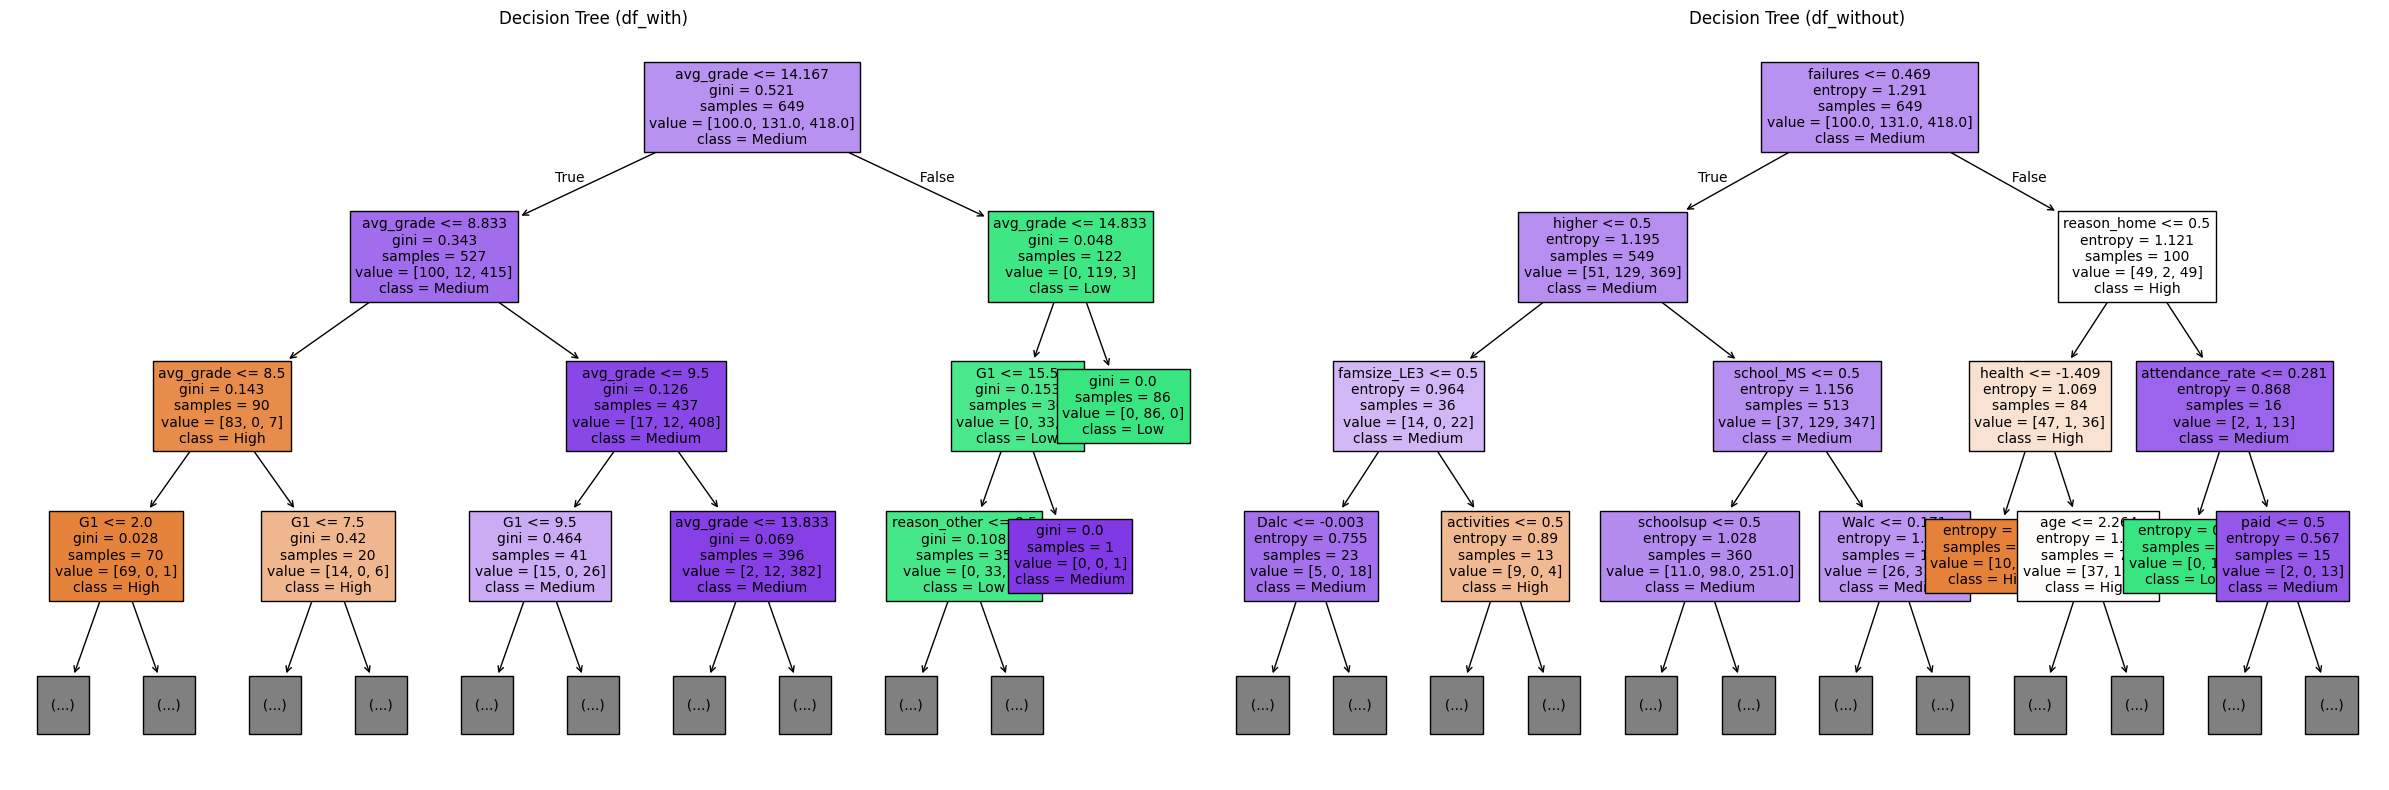

In [83]:
from sklearn import tree

best_dt_with = DecisionTreeClassifier(random_state=42, **tuning_results["df_with"]["DecisionTree"]["best_params"])
best_dt_with.fit(df_with, y_with_cls)

best_dt_without = DecisionTreeClassifier(random_state=42, **tuning_results["df_without"]["DecisionTree"]["best_params"])
best_dt_without.fit(df_without, y_without_cls)

fig, axes = plt.subplots(1, 2, figsize=(24, 8)) 


tree.plot_tree(
    best_dt_with,
    feature_names=df_with.columns,
    class_names=[str(cls) for cls in best_dt_with.classes_],
    filled=True,
    max_depth=3,          
    fontsize=10,          
    ax=axes[0]
)
axes[0].set_title("Decision Tree (df_with)")


tree.plot_tree(
    best_dt_without,
    feature_names=df_without.columns,
    class_names=[str(cls) for cls in best_dt_without.classes_],
    filled=True,
    max_depth=3,
    fontsize=10,
    ax=axes[1]
)
axes[1].set_title("Decision Tree (df_without)")

plt.tight_layout()
plt.show()

For the left decision tree , the average grade dominates the top node which  suggest that G1 and G2 are strong predictors, yet on the right the top node is failures and relies more on realistic student information. that concluds that df_with suffers from data leakage.

## Final Evaluation and Comparison

For the dataset including G1 and G2 , all models show extermely high performance, even on the test set , which is due to data leakage since G1 and G2 are strongly correlated to target G3 yet the models are actually overfitting and failing to generalize.
On the other hand , the dataset without G1 and G2 has perforamnce drops but is more realistic. Random Forest achieved a good balance between bias and variance which reduced overfitting

### Storytelling and Recommendations

Insights
1. High Absence Strongly Increases Risk of Academic Failure
Insight: Students absent more than 4 days within the first month show a 3× higher odds of failure, especially when coupled with moderate social activity and low study time. This “Skippers” group faces the highest risk of academic struggles.

Action: Deploy an automated attendance monitoring system that flags students exceeding absence thresholds early in the term. This system will trigger supportive outreach such as personalized counseling, attendance improvement plans, and targeted tutoring.

Ethical Consideration: Ensure attendance data is securely stored and shared only with authorized staff. Monitoring aims to support, not punish, and communications will focus on engagement rather than blame.

2. Quiet Achievers Benefit from Focused Academic Engagement
Insight: About 21% of students fall under the “Quiet Achievers” category — maintaining average grades but showing low engagement and appearing “under the radar.” Without proper support, they risk plateauing.

Action: Implement tailored workshops in time management and study skills, coupled with a structured mentorship program to boost academic confidence and growth.

Ethical Consideration: Participation is voluntary and inclusive, ensuring students from all backgrounds feel welcome and empowered, avoiding labels that might discourage involvement.


3. Family Educational Capital Amplifies Student Performance
Insight: Parental educational support shows a strong positive correlation with student outcomes, acting as a performance multiplier across diverse student groups.

Action: Launch a Family Engagement Initiative offering workshops that equip parents and guardians with tools to support learning at home, covering academic skills and emotional encouragement.

Ethical Consideration: Programs will be culturally sensitive and accessible, respecting diverse family contexts and avoiding any implication of parental fault for struggles. Language support and flexible scheduling will be provided.


4. Past Academic Failures Often Result in Persistent Trauma and Lower Performance
Insight: Students with previous course failures have significantly lower performance metrics, suggesting the presence of academic trauma that hinders recovery.

Action: Develop an “Academic Fresh Start” Recovery Program, integrating counseling, resilience building, and personalized learning plans to rebuild confidence and academic momentum.

Ethical Consideration: Participation is confidential and voluntary, emphasizing a growth mindset and avoiding stigmatization.
.

5. Cluster-Based Early Warning System Increases Prediction Accuracy to 92%
Insight: Leveraging student clustering based on multi-dimensional data yields a 92% accuracy in early identification of at-risk students, a marked improvement over traditional systems at 60%.

Action: Develop an automated classification tool that assigns students to risk clusters within the first 4 weeks, enabling timely, personalized interventions aligned to their specific profiles.

Ethical Consideration: The model will be routinely audited for bias and fairness. Students and families will receive clear explanations of how data is used and the nature of the support decisions.

